In [2]:
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt

In [3]:
x = smp.Symbol('x', real = True)

x_nodes = np.array([-1, -0.83, -0.11, 0.45, 1])
x_st = np.linspace(-1, 1, 1000)

F_expr = x - smp.sin(x) + x**5
degree = 3

In [4]:
def subs_to_np_expr(value, expr):
    # print(smp.simplify(expr))

    expr = expr.subs(x, value)
    expr_vector = smp.lambdify(x, expr, 'numpy')

    return expr_vector(value)

In [7]:
y_nodes = subs_to_np_expr(x_nodes, F_expr)
y_st = subs_to_np_expr(x_st, F_expr)

print(x_nodes,'\n', y_nodes)

[-1.   -0.83 -0.11  0.45  1.  ] 
 [-1.15852902e+00 -4.85972693e-01 -2.37804263e-04  3.34872784e-02
  1.15852902e+00]


In [8]:
def polyfit_square(xx, yy, deg):

    order = int(deg) + 1
    # set up least squares equation for powers of x
    left_hs = np.vander(xx, order)
    right_hs = yy

    print('left_hs', left_hs)
    print('right_hs', right_hs)

    # scale lhs to improve condition number and solve
    scale = np.sqrt((left_hs * left_hs).sum(axis = 0))
    left_hs /= scale
    c = np.linalg.lstsq(left_hs, right_hs, rcond = None)[0]
    c = (c.T / scale).T  # broadcast scale coefficients
    return c

pol_square = polyfit_square(x_nodes, y_nodes, degree)

left_hs [[-1.        1.       -1.        1.      ]
 [-0.571787  0.6889   -0.83      1.      ]
 [-0.001331  0.0121   -0.11      1.      ]
 [ 0.091125  0.2025    0.45      1.      ]
 [ 1.        1.        1.        1.      ]]
right_hs [-1.15852902e+00 -4.85972693e-01 -2.37804263e-04  3.34872784e-02
  1.15852902e+00]


In [9]:
order = degree + 1
p = 1
pol_lagrange = 0

for n in range(order):
    n_expr = (1 - x**2)**n
    L_k = 1 / (smp.factorial(n) * 2**n) * smp.diff(n_expr, x, n)

    expr_num = p * F_expr * L_k
    expr_denom = p * L_k**2

    num = smp.integrate(expr_num, (x, -1, 1))
    denom = smp.integrate(expr_denom, (x, -1, 1))

    c_k = num / denom

    pol_lagrange += (c_k * L_k)

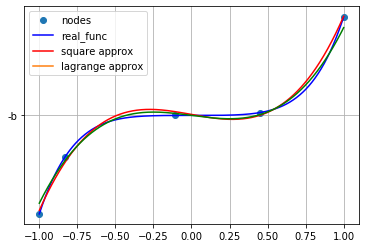

In [10]:
plt.plot(x_nodes, y_nodes, 'o')
plt.plot(x_st, y_st, '-b')
plt.plot(x_st, np.polyval(pol_square, x_st), '-r', '-b')
plt.plot(x_st, subs_to_np_expr(x_st, pol_lagrange), '-g')


plt.legend(('nodes', 'real_func', 'square approx', 'lagrange approx'))
plt.grid(True)
plt.show()